<a href="https://colab.research.google.com/github/marcoscleytton/python-atividades/blob/main/acoesgoogleemsf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
#  Definindo os tickers das ações (GOOGLE e MICROSOFT)
tickers = ['GOOGL', 'MSFT']

In [45]:
#  Obtenha os dados históricos das ações usando o yfinance
data = yf.download(tickers, start='2020-01-01', end='2020-12-31')

# Verifique quais colunas estão disponíveis
print(data.head())

# Se "Adj Close" estiver disponível, selecione-a
if 'Adj Close' in data:
    data = data['Adj Close']
else:
    print("Coluna 'Adj Close' não encontrada. Usando 'Close' como alternativa.")
    data = data['Close']  # Alternativa caso 'Adj Close' não esteja disponível


[*********************100%***********************]  2 of 2 completed

Price           Close                   High                    Low  \
Ticker          GOOGL        MSFT      GOOGL        MSFT      GOOGL   
Date                                                                  
2020-01-02  68.108376  153.323273  68.108376  153.428276  67.004158   
2020-01-03  67.752075  151.414124  68.360669  152.683705  67.045454   
2020-01-06  69.557945  151.805481  69.583321  151.872308  67.228582   
2020-01-07  69.423592  150.421341  69.841098  152.416391  69.246938   
2020-01-08  69.917725  152.817352  70.256604  153.495104  69.300178   

Price                        Open                Volume            
Ticker            MSFT      GOOGL        MSFT     GOOGL      MSFT  
Date                                                               
2020-01-02  151.137310  67.099702  151.566865  27278000  22622100  
2020-01-03  150.879566  67.079297  151.127764  23408000  21116200  
2020-01-06  149.399957  67.259926  149.944070  46768000  20813700  
2020-01-07  150.173158 

In [43]:
returns_daily = data.pct_change()

In [44]:
returns_cumulative = (1 + returns_daily).cumprod() - 1

In [46]:
mean_daily_returns = returns_daily.mean()

In [47]:
std_daily_returns = returns_daily.std()

In [48]:
print("Retorno Médio Diário:")
print(mean_daily_returns)
print("\nDesvio Padrão dos Retornos Diários:")
print(std_daily_returns)

Retorno Médio Diário:
Ticker
GOOGL    0.001243
MSFT     0.001711
dtype: float64

Desvio Padrão dos Retornos Diários:
Ticker
GOOGL    0.024285
MSFT     0.027734
dtype: float64


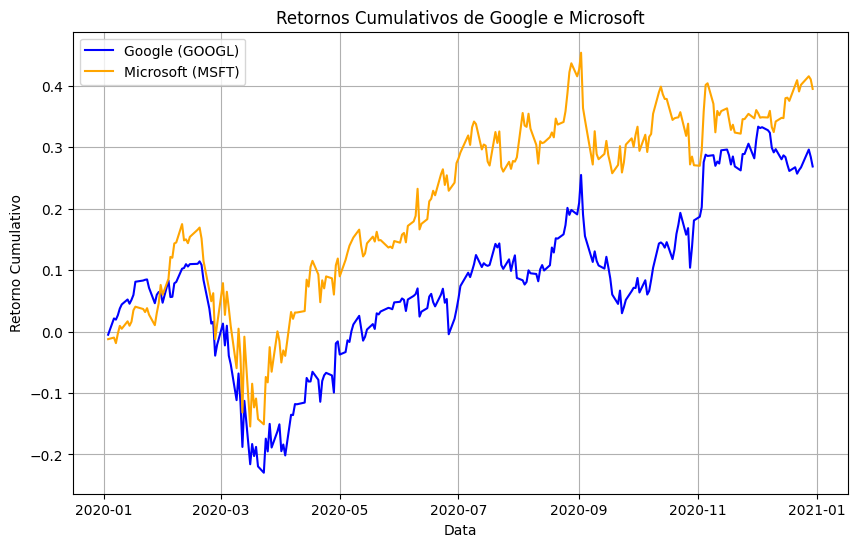

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(returns_cumulative.index, returns_cumulative['GOOGL'], label='Google (GOOGL)', color='blue')
plt.plot(returns_cumulative.index, returns_cumulative['MSFT'], label='Microsoft (MSFT)', color='orange')
plt.title('Retornos Cumulativos de Google e Microsoft')
plt.xlabel('Data')
plt.ylabel('Retorno Cumulativo')
plt.legend()
plt.grid()
plt.show()